# Credit Scoring

Created by **Tetiana Yatsiuk**  
✉️ *Email:*  tet.yatsiuk@gmail.com  
🔗 [*LinkedIn*](www.linkedin.com/in/tetianayatsiuk)   , 💻 [*GitHub*](https://github.com/YatsiukTetiana)

# 🗂️ Project Summary

This project simulates a common credit scoring task used by banks to evaluate customer creditworthiness when applying for a new credit card. The objective is to build and evaluate a logistic regression model that predicts whether a credit card application will be approved based on various customer attributes.

**Objectives**
- Build a binary classification model to predict credit card approval based on customer financial and demographic data.
- Preprocess and clean the dataset, handling categorical variables and missing values.
- Evaluate model performance using appropriate metrics beyond accuracy, such as precision, recall, F1-score, and specificity.
- Optimize model performance using hyperparameter tuning.
- Interpret model coefficients to assess the influence of each feature on credit approval decisions.

**Tools & Methods Used**
- ***Python Libraries:*** pandas, numpy, scikit-learn, matplotlib, seaborn
- ***Modeling:*** Logistic Regression
- ***Preprocessing:*** Encoding categorical variables, handling missing values, feature standardization
- ***Evaluation Metrics:*** Accuracy, Precision, Recall, F1-score, Specificity
- ***Optimization:*** Validation curves for tuning penalty and C hyperparameters




# 1. 📥 Loading Data

In [ ]:
import pandas as pd

# connect Google Drive
from google.colab import drive
drive.mount("/content/drive")

# change working folder
%cd /content/drive/MyDrive/Data_Analysis_Mate_Academy/Advanced_Analytics_Prediction_and_Clustering_Models

# load dataset
df = pd.read_csv("credit_card_data.csv")
df.head()

Mounted at /content/drive
/content/drive/MyDrive/Data_Analysis_Mate_Academy/Advanced_Analytics_Prediction_and_Clustering_Models


,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


# 2. 🗂️ Data Overview and Preparing for Building a Model

**Data description:**
- `card`: **target variable**, whether the application was approved (“yes” (1) or “no” (0));
- `reports`: number of “negative credit reports”;
- `age`: age of the client;
- `income`: annual income (divided by 10,000);
- `share`: the ratio of monthly credit card expenses to annual income;
- `expenditure`: average monthly credit card expenses;
- `owner`: “yes” (1) if the owner of the dwelling, “no” (0) if the owner rents;
- `selfempl`: “yes” (1) if self-employed, “no” (0) if not;
- `dependents`: the number of people who are dependent on the client + one;
- `months`: number of months the client has lived at the current address;
- `majorcards`: number of credit cards the client has;
- `active`: number of active credit accounts.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   object 
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   object 
 7   selfemp      1319 non-null   object 
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   int64  
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 123.8+ KB


No gaps in the data.

Replacing "yes"/"no" records by 1/0 in columns: `card`, `owner`, `selfemp`

In [ ]:
df['card'] = df['card'].replace({'yes': 1, 'no': 0})
df['owner'] = df['owner'].replace({'yes': 1, 'no': 0})
df['selfemp'] = df['selfemp'].replace({'yes': 1, 'no': 0})

/tmp/ipython-input-3-2014528360.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['card'] = df['card'].replace({'yes': 1, 'no': 0})
/tmp/ipython-input-3-2014528360.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['owner'] = df['owner'].replace({'yes': 1, 'no': 0})
/tmp/ipython-input-3-2014528360.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set 

In [ ]:
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5


In [ ]:
# Preparing Data for modelling
X = df.drop(['card'], axis=1)
y = df['card']

# 3. 🧠 Building and Training the Logistic Regression Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
# Dividing data intro train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [ ]:
# Scaling data
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Model training
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

# 4. 🧮 Model Weighting Coefficients

In [ ]:
# extract feature importance (coefficients)
coefficients = model.coef_[0]
feature_names = X.columns

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": coefficients
}).sort_values(by="Importance")

print(importance_df)

        Feature  Importance
0       reports   -2.164217
7    dependents   -0.239274
6       selfemp   -0.044217
8        months   -0.043387
1           age    0.023995
9    majorcards    0.049977
2        income    0.067027
5         owner    0.216917
10       active    0.665383
4   expenditure    5.028722
3         share    5.358795


Visualizing results:

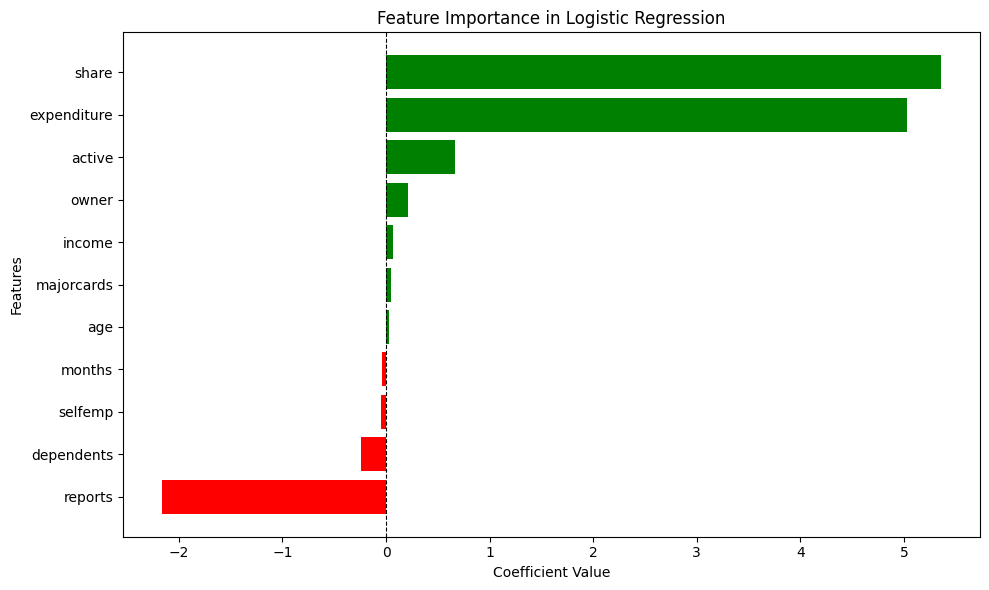

In [ ]:
import matplotlib.pyplot as plt

# create a bar chart
plt.figure(figsize=(10, 6))

colors = ["green" if val > 0 else "red" for val in importance_df["Importance"]]

plt.barh(importance_df["Feature"], importance_df["Importance"], color=colors)
plt.axvline(0, color="black", linewidth=0.8, linestyle="--")  # reference line at zero

plt.title("Feature Importance in Logistic Regression")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# 5. Model Coefficients Conclusion

The results showed the following order of importance of factors for decision-making when a customer applies for a credit card:

Factors **having effect** on the approvement:
1. Share: the ratio of monthly credit card expenses to annual income (coefficient 5.36)
The larger the share, the higher the chance of approving a credit card application.

2. Expenditure: average monthly credit card expenses (coefficient 5.03)
Increasing average monthly credit card expenses increases a “positive” effect on the likelihood of approving the opening of a credit card.

3. Reports: the number of negative credit histories (coefficient -2.16)
If the client has negative credit histories he is unlikely to open a new credit card.

Factors having **almost no effect** on the approvement:
- Active: number of active credit accounts (coefficient 0.67)
- Dependents: the number of people who are on the client's payroll + one  (coefficient -0.24)
- Owner: 1 if the client owns a home, 0 if the client rents a home (coefficient 0.22)
- Income: the ratio of monthly credit card expenses to annual income (coefficient 0.07)
- Majorcards: the number of credit cards the client has (coefficient 0.05)
- Months: the number of months the client has lived at the current address (coefficient -0.04)
- Selfemp: 1 if the client is self-employed, 0 if not (coefficient -0.04)
- Age: Client's age (coefficient 0.02)


# 6. 📈 Credit Scoring Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score

# predict classes
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9484848484848485


The model's correctness rate is almost 95%.

Distribution of values of the target variable of the model (%):

In [ ]:
df['card'].value_counts(normalize = True)

,proportion
card,
1,0.775588
0,0.224412


There is a strong imbalance of classes on the target variable (78% & 22%), so the accuracy metric is **not suitable** as a measure of model accuracy for this dataset.

**Classification Metrics:** Precision, Recall, F1-score, Specificity

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
from sklearn.metrics import confusion_matrix

# calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# calculate tp, tn, fp, fn
tn = cm[0, 0]
tp = cm[1, 1]
fn = cm[1, 0]
fp = cm[0, 1]

# calculate specificity
specificity = tn / (tn + fp)

# print results
print(confusion_matrix(y_test, y_pred))
print("Specificity:", specificity)

print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))

[[ 64   8]
 [  9 249]]
Specificity: 0.8888888888888888
Precision: 0.9688715953307393
Recall: 0.9651162790697675
F1 score: 0.9669902912621359


In the context of the business objective, it is important to reduce the risk that a credit card will be issued to a customer who cannot repay the loan. Thus, it is necessary to minimize false positives, and the most important metric is **precision**.

Precision is 96,89% which means that 96,89% of predicted positive classes is correct.

To reduce the number of rejections of potentially positive clients, when evaluating the model, it is necessary to take into account the **specificity**.
88,89% of negative results are correct.

As the specificy is the most problematic metric, it is reasonable to test other model hyperparameters (penalty and the inverse regularization force C)

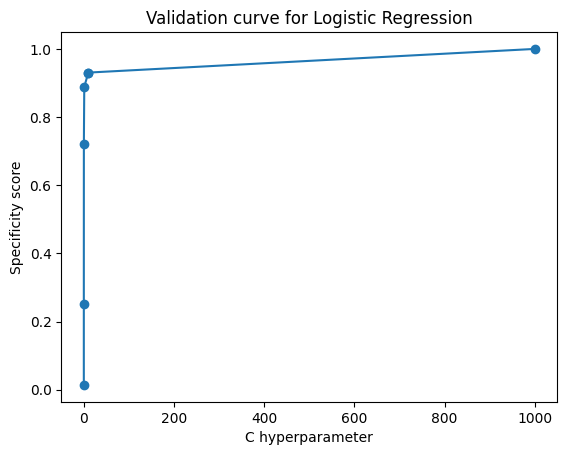

In [ ]:
# iterate on C and calculate model accuracy
possible_C = [0.001, 0.01, 0.1, 1, 10, 10, 1000]
specificity_scores = []

for C in possible_C:
  model = LogisticRegression(C = C)
  model.fit(X_train_scaled, y_train)
  y_pred = model.predict(X_test_scaled)
  cm = confusion_matrix(y_test, y_pred)
  tn = cm[0, 0]
  tp = cm[1, 1]
  fn = cm[1, 0]
  fp = cm[0, 1]
  specificity_scores.append(tn / (tn + fp))

# plot validation curve
plt.plot(possible_C, specificity_scores, marker='o')
plt.xlabel("C hyperparameter")
plt.ylabel("Specificity score")
plt.title("Validation curve for Logistic Regression")
plt.show()

The best value of C is 1000.
Building this model and evaluating its quality:

In [ ]:
best_model = LogisticRegression(C = 1000)
best_model.fit(X_train_scaled, y_train)
best_model.predict(X_test_scaled)

# calculate confusion matrix
cm_best = confusion_matrix(y_test, y_pred)

# calculate tp, tn, fp, fn
tn = cm_best[0, 0]
tp = cm_best[1, 1]
fn = cm_best[1, 0]
fp = cm_best[0, 1]

# calculate specificity
specificity_best = tn / (tn + fp)

# print results
print(confusion_matrix(y_test, y_pred))
print()
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))
print('Specificity:', specificity_best)

[[ 72   0]
 [  4 254]]

Precision: 1.0
Recall: 0.9844961240310077
F1 score: 0.9921875
Specificity: 1.0


After adjusting the hyperparameter C, the model became almost perfect.

It makes only 4 FN errors (“rejects” applications from creditworthy customers).

# 7. 🧾 Conclusions

Factors **having effect** on the credit card application approvement:
1. Share (coefficient 5.36)
The larger the share, the higher the chance of approving a credit card application.

2. Expenditure (coefficient 5.03)
Increasing average monthly credit card expenses increases a “positive” effect on the likelihood of approving the opening of a credit card.

3. Reports (coefficient -2.16)
If the client has negative credit histories he is unlikely to open a new credit card.

Factors having **almost no effect** on the approvement: Active, Dependents, Owner, Income, Majorcards, Months, Selfemp, Age.

The best model describing the credit card approval is Logostic Regression with the inverse regularization force hyperparameter `C = 1000`.